In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
file_path = '/kaggle/input/heart-attack-dataset/heart_attack_dataset.csv'
df = pd.read_csv(file_path)
# Show the 
df.head(), df.columns

(   Gender  Age  Blood Pressure (mmHg)  Cholesterol (mg/dL) Has Diabetes  \
 0    Male   70                    181                  262           No   
 1  Female   55                    103                  253          Yes   
 2    Male   42                     95                  295          Yes   
 3    Male   84                    106                  270           No   
 4    Male   86                    187                  296          Yes   
 
   Smoking Status   Chest Pain Type                            Treatment  
 0          Never    Typical Angina                    Lifestyle Changes  
 1          Never   Atypical Angina                          Angioplasty  
 2        Current    Typical Angina                          Angioplasty  
 3          Never   Atypical Angina  Coronary Artery Bypass Graft (CABG)  
 4        Current  Non-anginal Pain                           Medication  ,
 Index(['Gender', 'Age', 'Blood Pressure (mmHg)', 'Cholesterol (mg/dL)',
        'Has Diabe

In [10]:
# check for missing Values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Gender                 1000 non-null   object
 1   Age                    1000 non-null   int64 
 2   Blood Pressure (mmHg)  1000 non-null   int64 
 3   Cholesterol (mg/dL)    1000 non-null   int64 
 4   Has Diabetes           1000 non-null   object
 5   Smoking Status         1000 non-null   object
 6   Chest Pain Type        1000 non-null   object
 7   Treatment              1000 non-null   object
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
# Summary of the dataset
df.describe()

,Age,Blood Pressure (mmHg),Cholesterol (mg/dL)
count,1000.000000,1000.000000,1000.000000
mean,60.338000,145.440000,223.789000
std,17.317496,31.756525,42.787817
min,30.000000,90.000000,150.000000
25%,45.000000,118.000000,185.000000
50%,60.500000,146.000000,225.500000
75%,76.000000,173.000000,259.000000
max,89.000000,199.000000,299.000000


In [12]:
# Missing Vakues
#Handle missing values if necessary

df = df.fillna(df.mean(numeric_only=True))

In [13]:
#Verify no missing value remaining
df.isnull().sum()


Gender                   0
Age                      0
Blood Pressure (mmHg)    0
Cholesterol (mg/dL)      0
Has Diabetes             0
Smoking Status           0
Chest Pain Type          0
Treatment                0
dtype: int64

In [18]:
# Convert categorical columns to numeric
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Has Diabetes'] = df['Has Diabetes'].map({'Yes': 1, 'No': 0})
df['Smoking Status'] = df['Smoking Status'].map({'Smoker': 1, 'Non-Smoker': 0})
df['Chest Pain Type'] = df['Chest Pain Type'].astype('category').cat.codes

# Check the updated dataframe
df.head()

,Gender,Age,Blood Pressure (mmHg),Cholesterol (mg/dL),Has Diabetes,Smoking Status,Chest Pain Type,Treatment
0,1,70,181,262,0,NaN,3,Lifestyle Changes
1,0,55,103,253,1,NaN,1,Angioplasty
2,1,42,95,295,1,NaN,3,Angioplasty
3,1,84,106,270,0,NaN,1,Coronary Artery Bypass Graft (CABG)
4,1,86,187,296,1,NaN,2,Medication


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


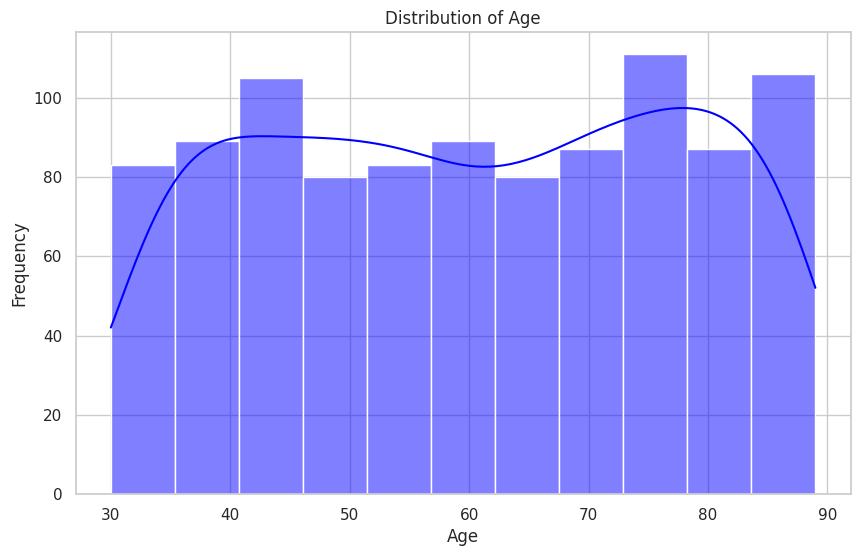

In [4]:
# Matplotlib for  graphs

import matplotlib.pyplot as plt

import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


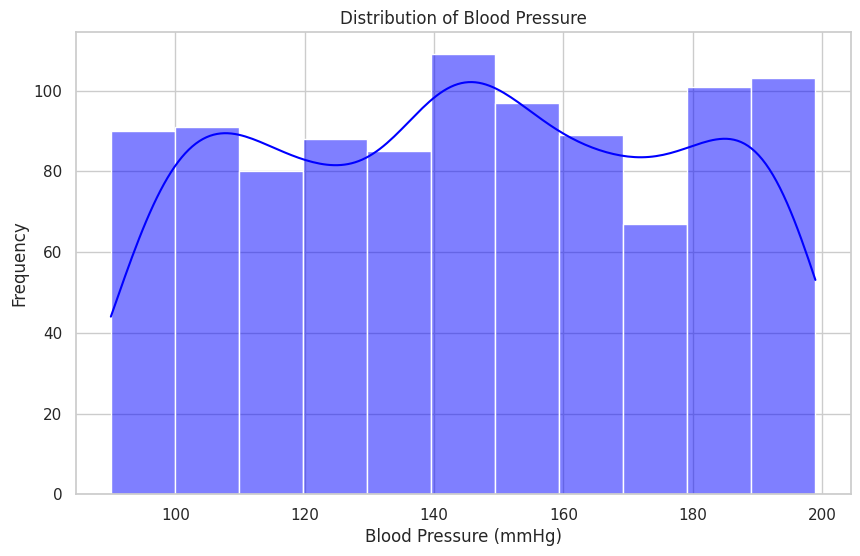

In [8]:
# Distribution of Blood Pressure
plt.figure(figsize=(10, 6))
sns.histplot(df['Blood Pressure (mmHg)'], kde=True, color='blue')
plt.title('Distribution of Blood Pressure')
plt.xlabel('Blood Pressure (mmHg)')
plt.ylabel('Frequency')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


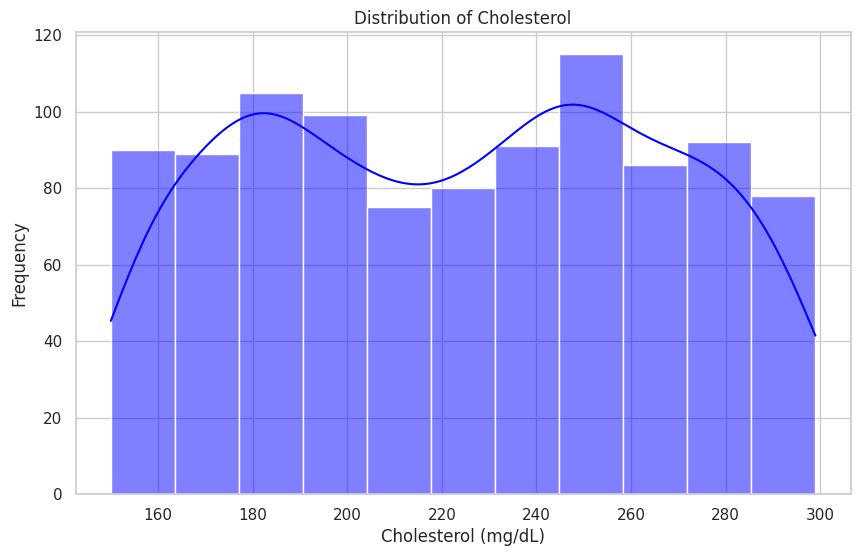

In [10]:
# Distribution of Cholesterol
plt.figure(figsize=(10, 6))
sns.histplot(df['Cholesterol (mg/dL)'], kde=True, color='blue')
plt.title('Distribution of Cholesterol')
plt.xlabel('Cholesterol (mg/dL)')
plt.ylabel('Frequency')
plt.show()

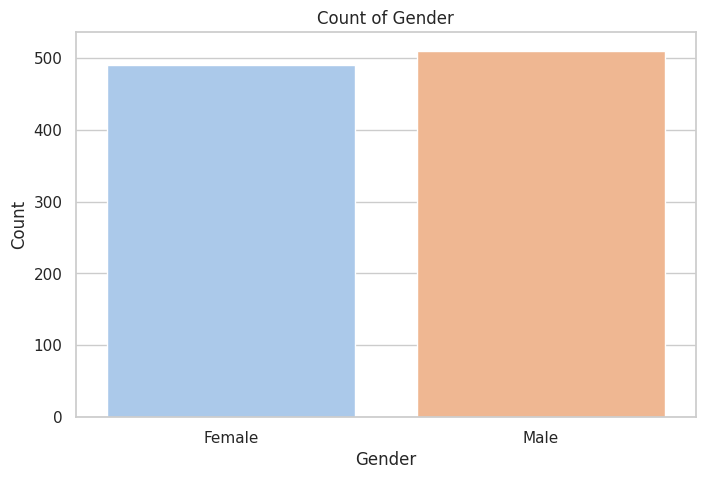

In [11]:
# Count of Gender
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=df, palette='pastel')
plt.title('Count of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.show()

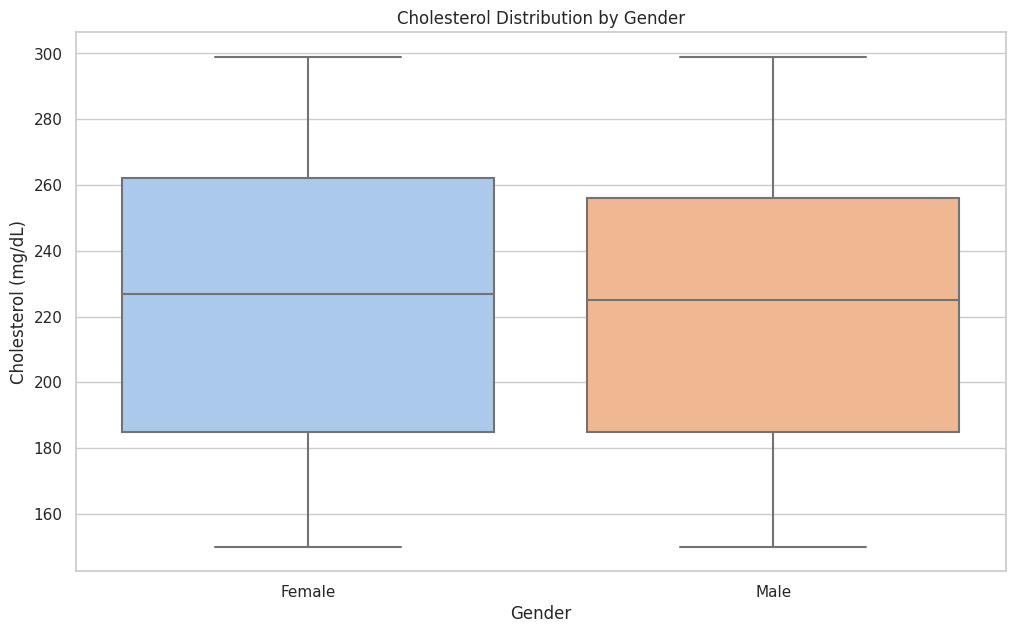

In [12]:
# Distribution of Cholesterol by Gender
plt.figure(figsize=(12, 7))
sns.boxplot(x='Gender', y='Cholesterol (mg/dL)', data=df, palette='pastel')
plt.title('Cholesterol Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Cholesterol (mg/dL)')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.show()

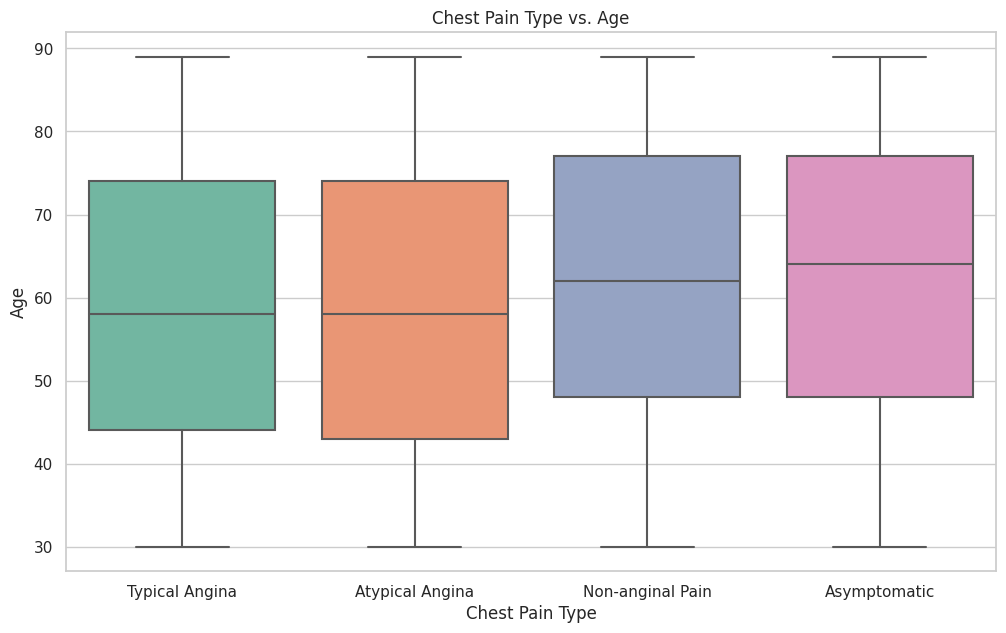

In [13]:
# Chest Pain Type vs. Age
plt.figure(figsize=(12, 7))
sns.boxplot(x='Chest Pain Type', y='Age', data=df, palette='Set2')
plt.title('Chest Pain Type vs. Age')
plt.xlabel('Chest Pain Type')
plt.ylabel('Age')
plt.show()

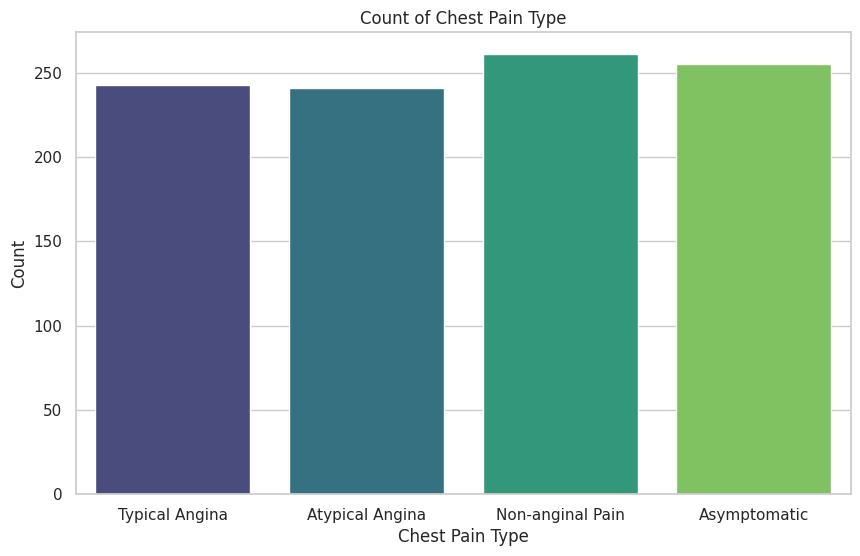

In [14]:
# Count of Chest Pain Type
plt.figure(figsize=(10, 6))
sns.countplot(x='Chest Pain Type', data=df, palette='viridis')
plt.title('Count of Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()

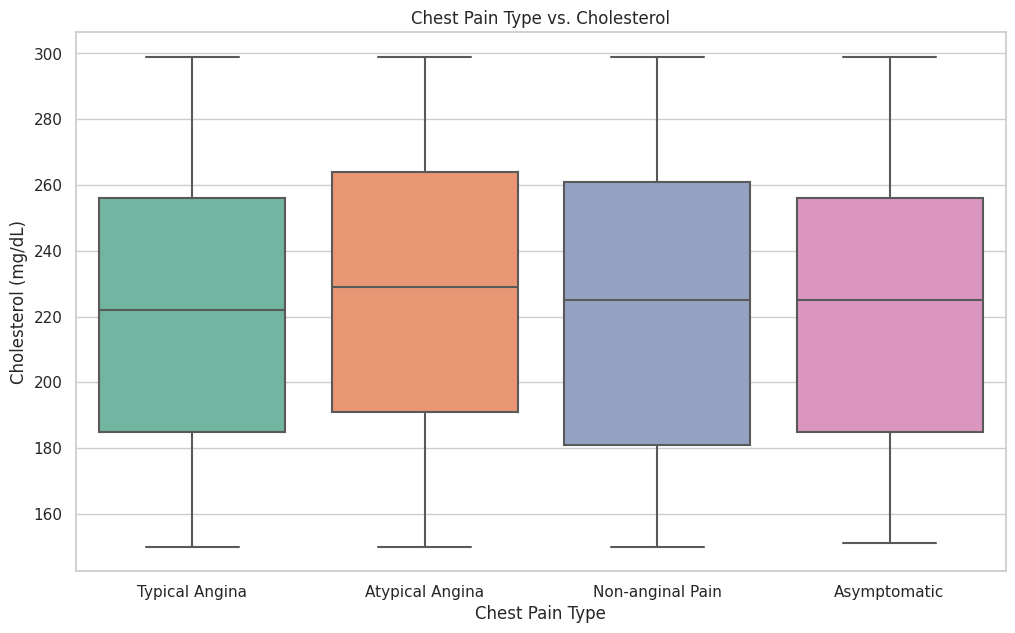

In [15]:
# Chest Pain Type vs. Cholesterol
plt.figure(figsize=(12, 7))
sns.boxplot(x='Chest Pain Type', y='Cholesterol (mg/dL)', data=df, palette='Set2')
plt.title('Chest Pain Type vs. Cholesterol')
plt.xlabel('Chest Pain Type')
plt.ylabel('Cholesterol (mg/dL)')
plt.show()

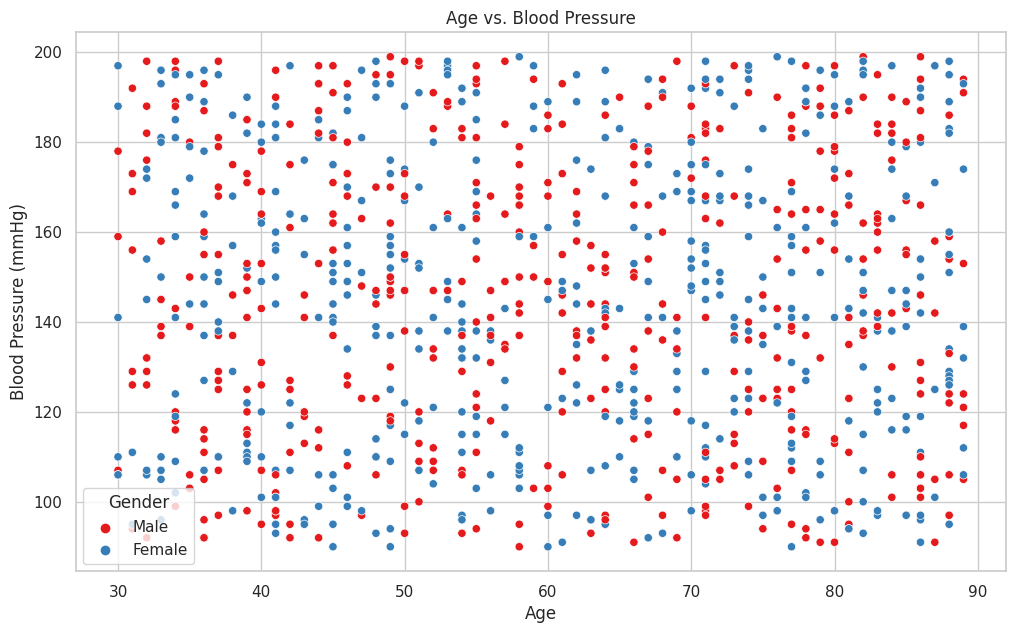

In [16]:
# Age vs. Blood Pressure
plt.figure(figsize=(12, 7))
sns.scatterplot(x='Age', y='Blood Pressure (mmHg)', data=df, hue='Gender', palette='Set1')
plt.title('Age vs. Blood Pressure')
plt.xlabel('Age')
plt.ylabel('Blood Pressure (mmHg)')
plt.show()

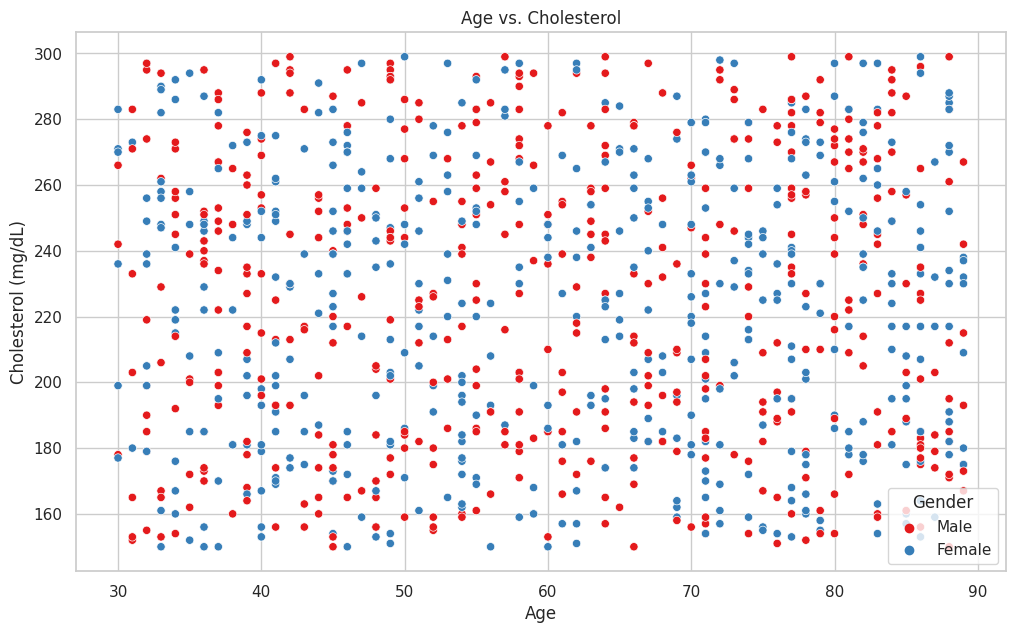

In [17]:
# Age vs. Cholesterol
plt.figure(figsize=(12, 7))
sns.scatterplot(x='Age', y='Cholesterol (mg/dL)', data=df, hue='Gender', palette='Set1')
plt.title('Age vs. Cholesterol')
plt.xlabel('Age')
plt.ylabel('Cholesterol (mg/dL)')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


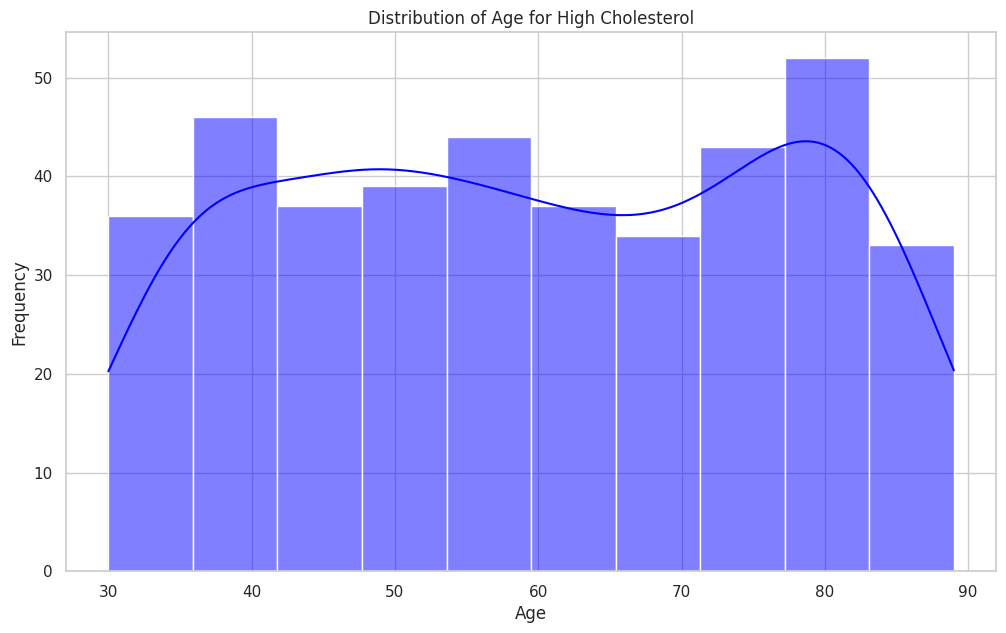

In [18]:
# Distribution of Age for high Cholesterol (Cholesterol > 240 mg/dL)
df_high_cholesterol = df[df['Cholesterol (mg/dL)'] > 240]

plt.figure(figsize=(12, 7))
sns.histplot(df_high_cholesterol['Age'], kde=True, color='blue')
plt.title('Distribution of Age for High Cholesterol')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


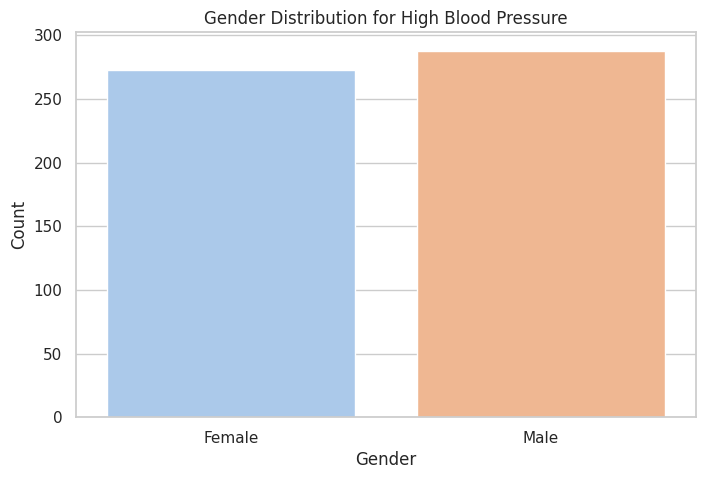

In [19]:
# Gender Distribution for high Blood Pressure (Blood Pressure > 140 mmHg)
df_high_bp = df[df['Blood Pressure (mmHg)'] > 140]

plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=df_high_bp, palette='pastel')
plt.title('Gender Distribution for High Blood Pressure')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.show()

#